In [1]:
%config IPCompleter.use_jedi=False

# Case Study

In this Case, we’re going to work through a series of simple neural network architectures and compare their performance on the MNIST handwritten digits dataset. The goal for all the networks we examine is the same: take an input image (28x28 pixels) of a handwritten single digit (0–9) and classify the image as the appropriate digit.

State of the art neural network approaches have achieved near-perfect performance, classifying 99.8% of digits correctly from a left-out test set of digits. This impressive performance has real world benefits as well. The US Postal Service processes 493.4 million pieces of mail per day, and 1% of that workload is 4.9 million pieces of mail. Accurate automation can prevent postal workers from individually handling and examining millions of parcels each day. Of course, automatically reading complete addresses isn’t as simple as processing individual digits, but let’s learn to crawl before we try to jog.

It’s always a good idea to familiarize yourself with a dataset before diving into any machine learning task. Here are some examples of the images in the dataset:
![mnist](image/mnist.png)

In [5]:
import tensorflow as ts

In [6]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

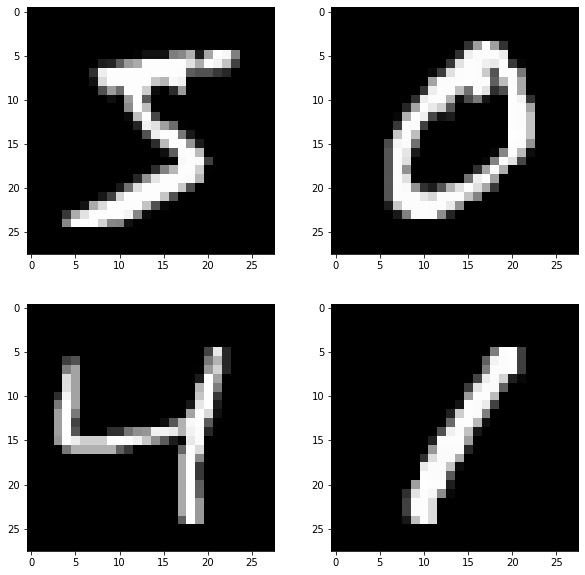

In [16]:
# plot 4 images as gray scale
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [19]:
# fix random seed for reproducibility
seed = 4
np.random.seed(seed)

In [20]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)
print(X_train.shape)

784
(60000, 28, 28)


In [21]:
#Flattening numpy array 28*28 to 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [22]:
X_train.shape

(60000, 784)

In [30]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

#### One hot encoding

Finally, the output variable is an integer **from 0 to 9**. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [25]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [26]:
y_train.shape

(60000, 10)

In [27]:
y_train[0]
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs **(784)**. A **rectifier activation** function is used for the neurons in the hidden layer.

A **softmax activation** function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the **loss function** (called **categorical_crossentropy** in Keras) and the efficient **ADAM gradient descent** algorithm is used to learn the weights.

<img src="../img/softmax.jpeg">

In [33]:
y_train[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_pixels//10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
# define baseline model
def baseline_model2():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_pixels//10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate=0.1))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Backpropagation Steps

![back](image/back.png)

In [45]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 7s - loss: 1.1057 - accuracy: 0.8632 - val_loss: 0.2598 - val_accuracy: 0.9314
Epoch 2/10
300/300 - 3s - loss: 0.1923 - accuracy: 0.9453 - val_loss: 0.1903 - val_accuracy: 0.9492
Epoch 3/10
300/300 - 3s - loss: 0.1231 - accuracy: 0.9642 - val_loss: 0.1914 - val_accuracy: 0.9532
Epoch 4/10
300/300 - 3s - loss: 0.0892 - accuracy: 0.9724 - val_loss: 0.1504 - val_accuracy: 0.9615
Epoch 5/10
300/300 - 3s - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.1444 - val_accuracy: 0.9641
Epoch 6/10
300/300 - 3s - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.1470 - val_accuracy: 0.9650
Epoch 7/10
300/300 - 3s - loss: 0.0530 - accuracy: 0.9836 - val_loss: 0.1565 - val_accuracy: 0.9677
Epoch 8/10
300/300 - 3s - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.1451 - val_accuracy: 0.9675
Epoch 9/10
300/300 - 3s - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.1750 - val_accuracy: 0.9661
Epoch 10/10
300/300 - 3s - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.1428 - val_accuracy: 0.9692

In [46]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 78)                61230     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                790       
Total params: 677,460
Trainable params: 677,460
Non-trainable params: 0
_________________________________________________________________


In [49]:
import keras
keras.utils.plot_model(model,show_layer_names=True, rankdir=True, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [47]:
model.metrics_names

['loss', 'accuracy']

In [50]:
loss,acc = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names[0],loss,model.metrics_names[1],acc)

loss 0.14281225204467773 accuracy 0.9692000150680542


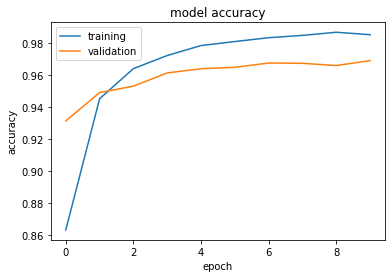

Test loss: 0.143
Test accuracy: 0.969


In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {acc:.3}')

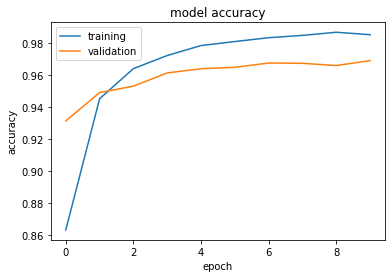

Test loss: 0.143
Test accuracy: 0.969


In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {acc:.3}')

##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

### List of Optimizers in Keras
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

https://keras.io/api/optimizers/


### Now we let the user to determine the number of layers and the size of each size respectively

In [30]:
# define baseline model
def baseline_model_updated(weights_size):
    model = Sequential()
    
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    for weight_size in weights_size:
        model.add(Dense(weight_size, kernel_initializer='normal', activation='relu'))
        
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

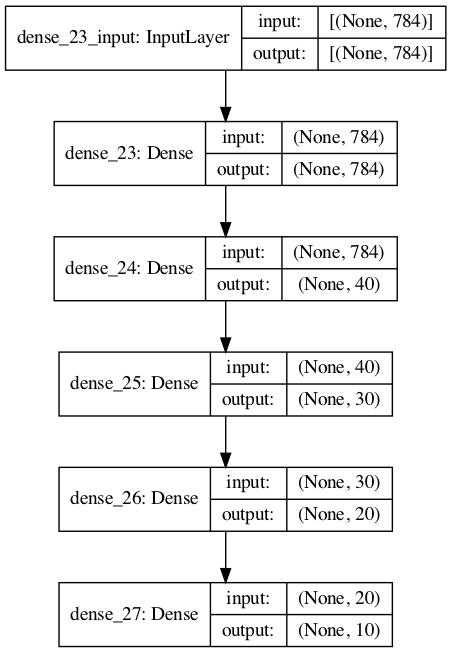

In [37]:
import keras
# build the model
weights_size = [40,30,20]
model_updated = baseline_model_updated(weights_size)

keras.utils.plot_model(model_updated,show_layer_names=True, rankdir=True, show_shapes=True, expand_nested=True,dpi=100)

In [32]:
# Fit the model
history_updated = model_updated.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 2s - loss: 0.7299 - accuracy: 0.7642 - val_loss: 0.2798 - val_accuracy: 0.9190
Epoch 2/10
300/300 - 2s - loss: 0.2220 - accuracy: 0.9365 - val_loss: 0.1766 - val_accuracy: 0.9492
Epoch 3/10
300/300 - 2s - loss: 0.1476 - accuracy: 0.9570 - val_loss: 0.1367 - val_accuracy: 0.9609
Epoch 4/10
300/300 - 1s - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.1237 - val_accuracy: 0.9652
Epoch 5/10
300/300 - 1s - loss: 0.0811 - accuracy: 0.9766 - val_loss: 0.1024 - val_accuracy: 0.9710
Epoch 6/10
300/300 - 1s - loss: 0.0619 - accuracy: 0.9815 - val_loss: 0.0917 - val_accuracy: 0.9734
Epoch 7/10
300/300 - 1s - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 8/10
300/300 - 1s - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0823 - val_accuracy: 0.9759
Epoch 9/10
300/300 - 1s - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0919 - val_accuracy: 0.9745
Epoch 10/10
300/300 - 2s - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0947 - val_accuracy: 0.9762

In [58]:
model_updated.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_24 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_25 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_26 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
Total params: 648,900
Trainable params: 648,900
Non-trainable params: 0
_________________________________________________________________


In [59]:
loss,acc = model_updated.evaluate(X_test, y_test, verbose=0)
print(model_updated.metrics_names[0],loss,model_updated.metrics_names[1],acc)

loss 0.09140212088823318 accuracy 0.974399983882904


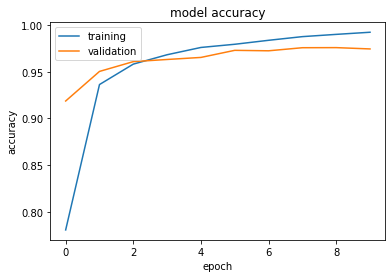

Test loss: 0.0914
Test accuracy: 0.974


In [60]:
plt.plot(history_updated.history['accuracy'])
plt.plot(history_updated.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {acc:.3}')

In [10]:
%pwd

'/Users/hmd/GitHub/DSA/bootcamp2/Python/Week11/MNIST'

# Convolutional Neural Networks

GAN - Generative Adversarial Network

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

<img src="../img/convolution-1.png">

### Convolution process

<img src="../img/conv_image.gif">

### Padding and Strides

<img src="../img/keras_conv2d_padding.gif">

### Max Pooling - Downsampling

<img src="../img/maxpool.jpeg">

# MNIST Convolutional Neural Network Architecture

<img src="../img/Convolutional-Neural-Network.jpeg">

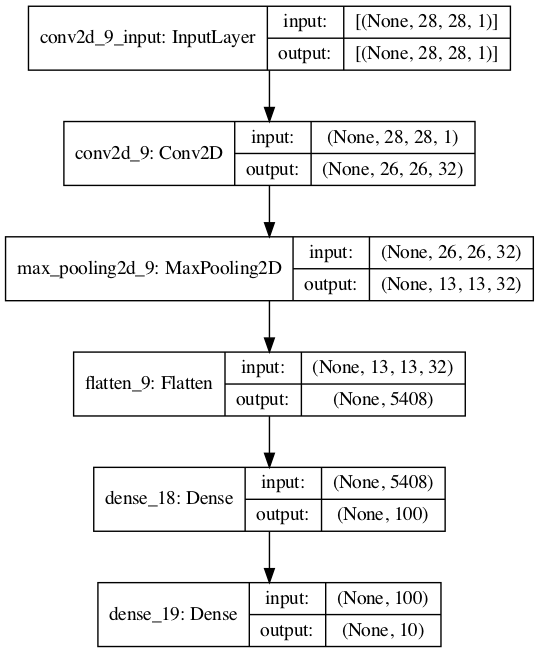

In [16]:
import keras

conv_model = define_model()
keras.utils.plot_model(conv_model,show_layer_names=True,show_shapes=True, expand_nested=True,dpi=100)

In [75]:
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()

KeyboardInterrupt: 